In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
import random
from sklearn.feature_selection import SequentialFeatureSelector #Para stepwise
from sklearn.linear_model import RidgeCV, Ridge #Para Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from ydata_profiling import ProfileReport
from apyori import apriori

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [141]:
hospital_df = pd.read_csv('risk_factors_cervical_cancer.csv', encoding='latin1')
hospital_df = hospital_df.replace('?', None)
hospital_df = hospital_df.apply(pd.to_numeric, errors='ignore')
hospital_df.head()

C:\Users\Personal\AppData\Local\Temp\ipykernel_15928\2281367633.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  hospital_df = hospital_df.apply(pd.to_numeric, errors='ignore')


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [142]:
hospital_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
# cast object Dtype to float & remain the int64
hospital_df = hospital_df.apply(pd.to_numeric, errors='ignore')
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

C:\Users\Personal\AppData\Local\Temp\ipykernel_15928\1224013655.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  hospital_df = hospital_df.apply(pd.to_numeric, errors='ignore')


In [144]:
# analysis = ProfileReport(hospital_df)
# analysis.to_file('analysis.html')

### Obtenemos las variables numéricas

In [145]:
numerics_columns = hospital_df.select_dtypes(include=['float64', 'int64'])
print(numerics_columns.columns.values)

['Age' 'Number of sexual partners' 'First sexual intercourse'
 'Num of pregnancies' 'Smokes' 'Smokes (years)' 'Smokes (packs/year)'
 'Hormonal Contraceptives' 'Hormonal Contraceptives (years)' 'IUD'
 'IUD (years)' 'STDs' 'STDs (number)' 'STDs:condylomatosis'
 'STDs:cervical condylomatosis' 'STDs:vaginal condylomatosis'
 'STDs:vulvo-perineal condylomatosis' 'STDs:syphilis'
 'STDs:pelvic inflammatory disease' 'STDs:genital herpes'
 'STDs:molluscum contagiosum' 'STDs:AIDS' 'STDs:HIV' 'STDs:Hepatitis B'
 'STDs:HPV' 'STDs: Number of diagnosis' 'STDs: Time since first diagnosis'
 'STDs: Time since last diagnosis' 'Dx:Cancer' 'Dx:CIN' 'Dx:HPV' 'Dx'
 'Hinselmann' 'Schiller' 'Citology' 'Biopsy']


### Contar la cantidad de campos numéricos

In [146]:
num_int64_columns = len(numerics_columns.columns.values)
print(num_int64_columns)

36


In [147]:
numeric = hospital_df[numerics_columns.columns.values]
# replace ? with 0
# numeric = numeric.replace('?', None)
numeric

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [148]:
null_counts = numeric.isnull().sum()
null_counts[null_counts > 0].count()

26

In [149]:
zero_counts = (numeric == 0).sum()
zero_counts[zero_counts > 650]

Smokes                                722
Smokes (years)                        722
Smokes (packs/year)                   722
IUD                                   658
IUD (years)                           658
STDs                                  674
STDs (number)                         674
STDs:condylomatosis                   709
STDs:cervical condylomatosis          753
STDs:vaginal condylomatosis           749
STDs:vulvo-perineal condylomatosis    710
STDs:syphilis                         735
STDs:pelvic inflammatory disease      752
STDs:genital herpes                   752
STDs:molluscum contagiosum            752
STDs:AIDS                             753
STDs:HIV                              735
STDs:Hepatitis B                      752
STDs:HPV                              751
STDs: Number of diagnosis             787
Dx:Cancer                             840
Dx:CIN                                849
Dx:HPV                                840
Dx                                

In [150]:
zero_counts[zero_counts > 0].count()

31

In [151]:
zero_counts[zero_counts > 650]

Smokes                                722
Smokes (years)                        722
Smokes (packs/year)                   722
IUD                                   658
IUD (years)                           658
STDs                                  674
STDs (number)                         674
STDs:condylomatosis                   709
STDs:cervical condylomatosis          753
STDs:vaginal condylomatosis           749
STDs:vulvo-perineal condylomatosis    710
STDs:syphilis                         735
STDs:pelvic inflammatory disease      752
STDs:genital herpes                   752
STDs:molluscum contagiosum            752
STDs:AIDS                             753
STDs:HIV                              735
STDs:Hepatitis B                      752
STDs:HPV                              751
STDs: Number of diagnosis             787
Dx:Cancer                             840
Dx:CIN                                849
Dx:HPV                                840
Dx                                

<Axes: >

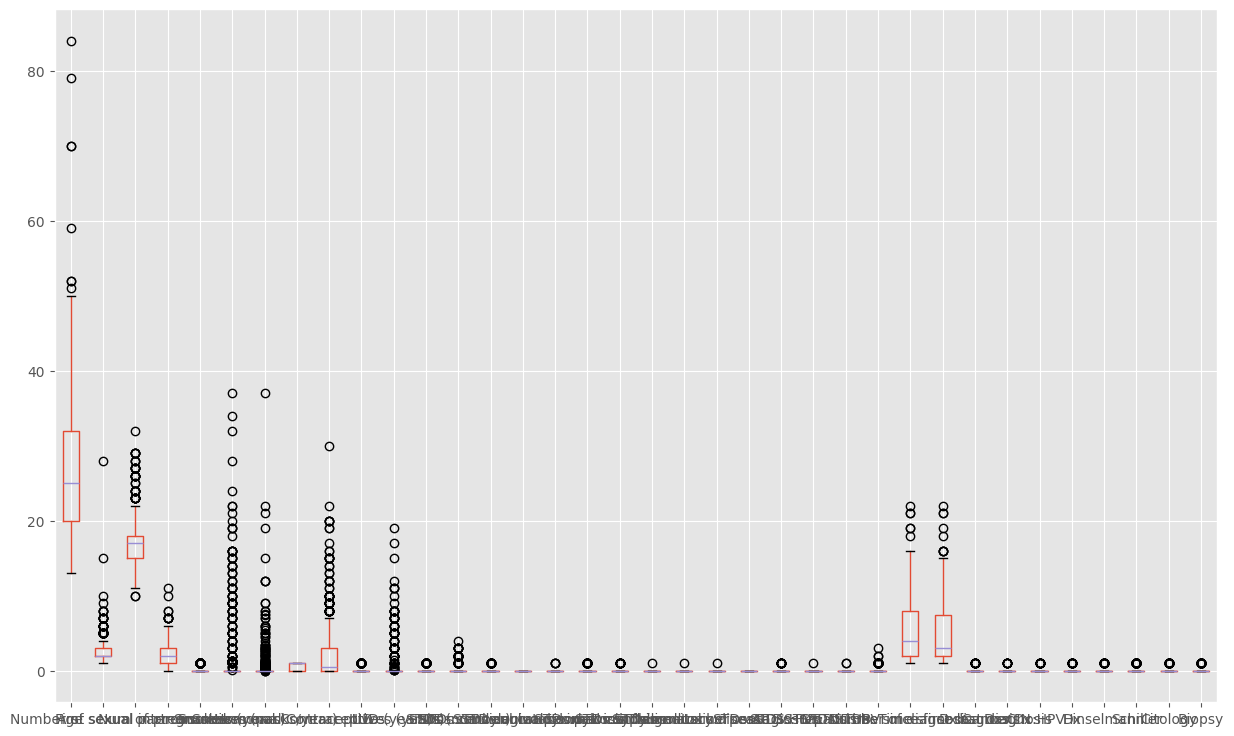

In [152]:
numeric.boxplot()

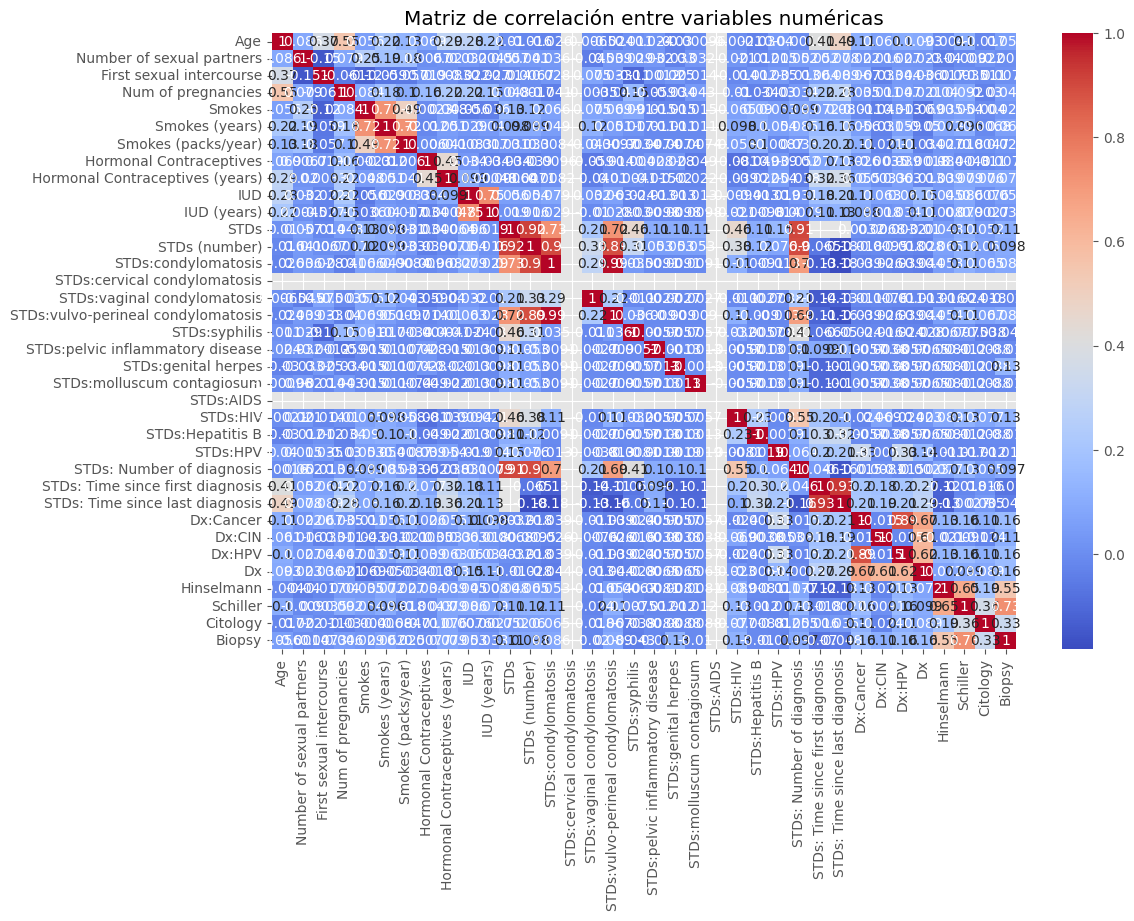

In [153]:
correlation_matrix = numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [154]:
def graphNumericDistribution(data, title, xlabel, ylabel):
    # Ensure data is numeric and drop NaN values
    data = data.dropna().apply(pd.to_numeric, errors='coerce').dropna()
    
    # Calculate statistics
    mean = round(data.mean(), 2)
    median = round(data.median(), 2)
    mode_result = data.mode()
    if not mode_result.empty:
        mode = round(mode_result.iloc[0], 2)  # Safely handle mode; take first if multiple
    else:
        mode = "N/A"
    max_value = round(data.max(), 2)
    min_value = round(data.min(), 2)
    
    # Plotting
    plt.figure()
    sns.histplot(data, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.axvline(mean, color='r', linestyle='--', label='Mean')
    plt.axvline(median, color='g', linestyle='--', label='Median')
    plt.legend()

    # Adjust text placement and handle mode display
    plt.text(0.98, 0.82, f'Mean: {mean}', transform=plt.gca().transAxes, ha='right', va='top')
    plt.text(0.98, 0.76, f'Median: {median}', transform=plt.gca().transAxes, ha='right', va='top')
    plt.text(0.98, 0.70, f'Mode: {mode}', transform=plt.gca().transAxes, ha='right', va='top')
    plt.text(0.98, 0.64, f'Max: {max_value}', transform=plt.gca().transAxes, ha='right', va='top')
    plt.text(0.98, 0.58, f'Min: {min_value}', transform=plt.gca().transAxes, ha='right', va='top')

count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64


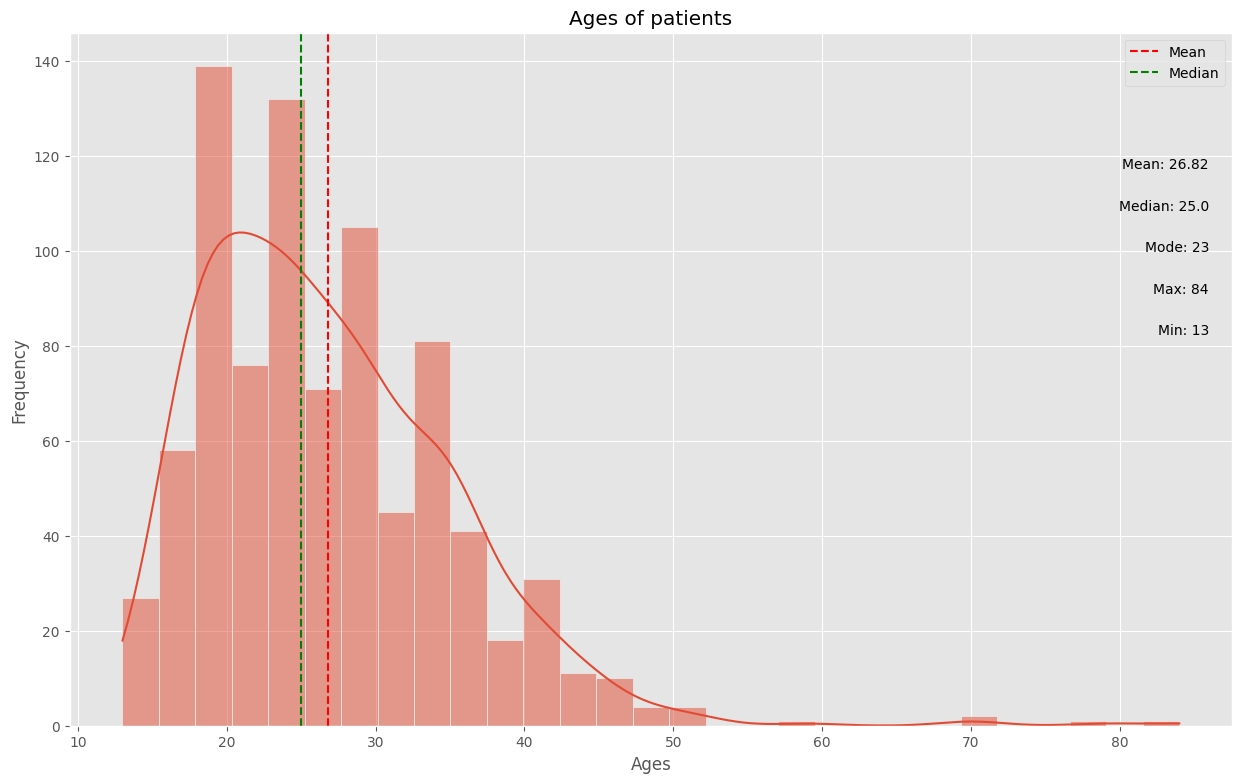

In [155]:
ages = numeric['Age']
graphNumericDistribution(ages, 'Ages of patients', 'Ages', 'Frequency')
print(ages.describe())

In [156]:
numeric
# sexPartners = numeric['Number of sexual partners']
# graphNumericDistribution(sexPartners, "Patients' Number of sexual partners", 'Ages', 'Frequency')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


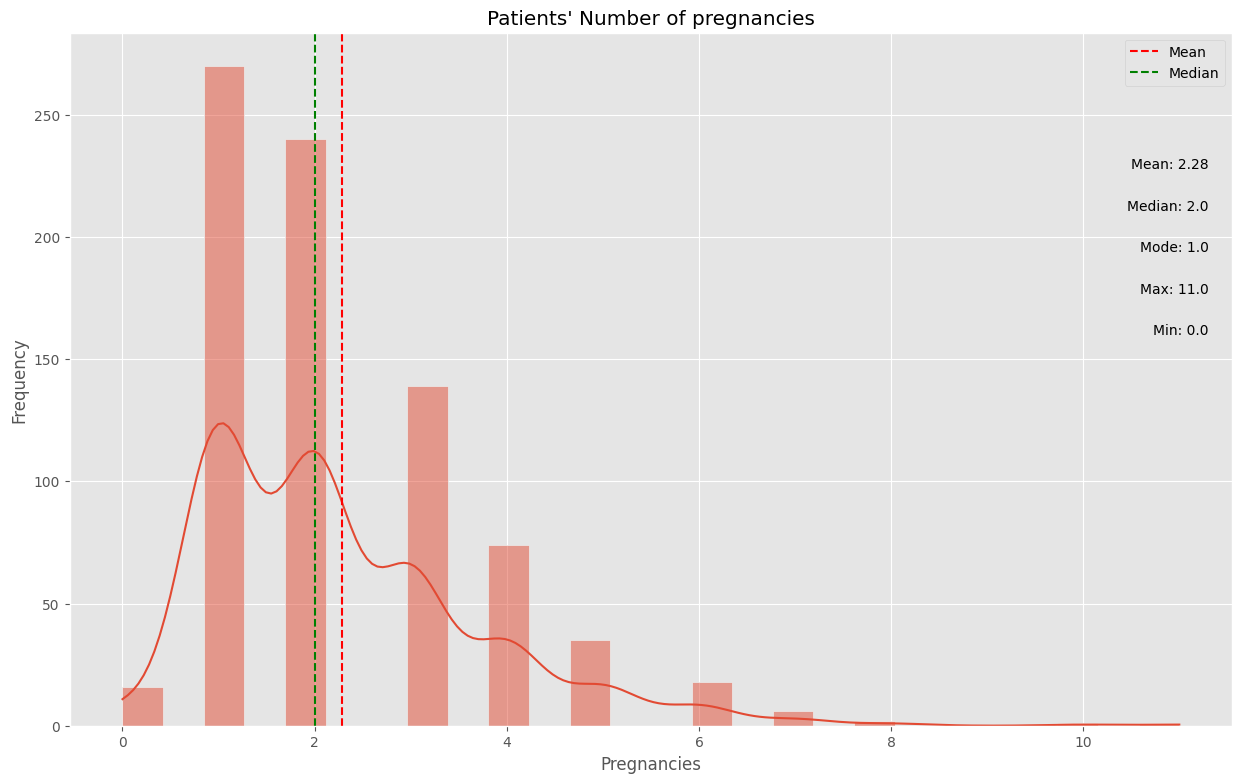

In [157]:
data = numeric['Num of pregnancies']
graphNumericDistribution(data, "Patients' Number of pregnancies", 'Pregnancies', 'Frequency')

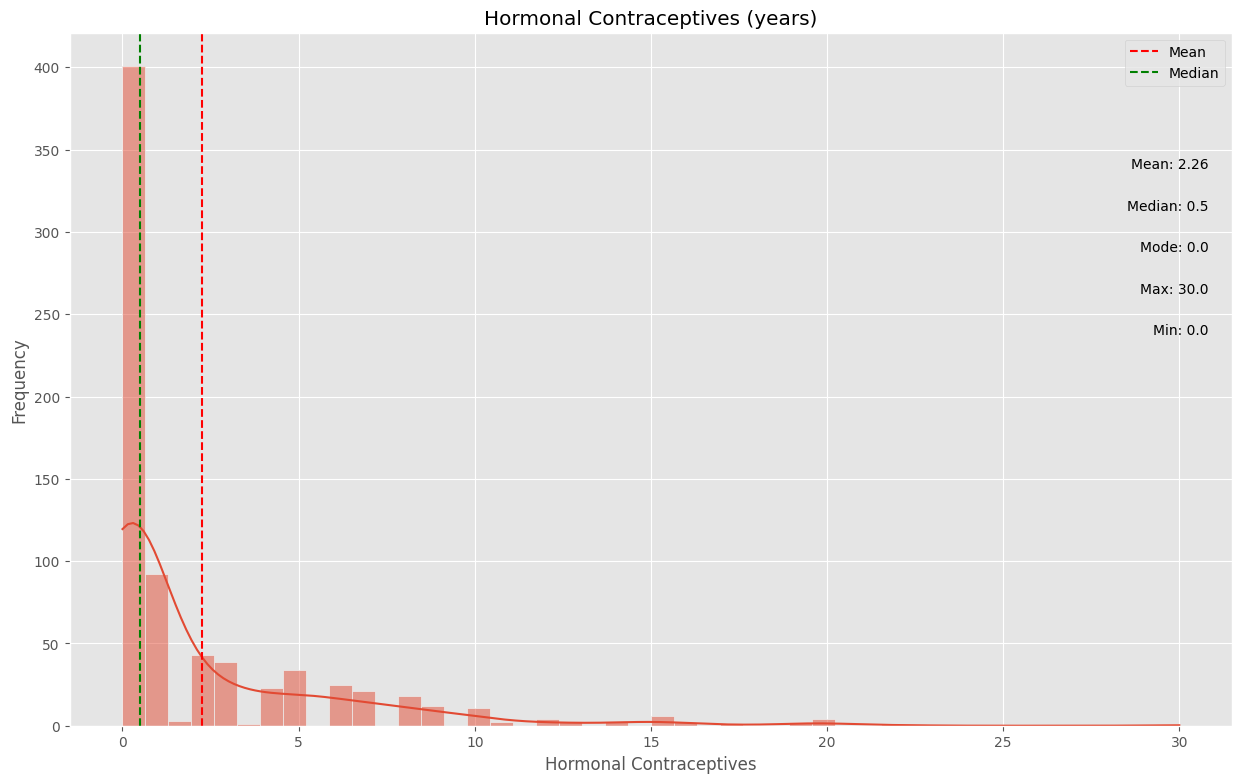

In [158]:
data = numeric['Hormonal Contraceptives (years)']
graphNumericDistribution(data, "Hormonal Contraceptives (years)", 'Hormonal Contraceptives', 'Frequency')

C:\Users\Personal\AppData\Local\Temp\ipykernel_15928\2634683388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric[column] = pd.to_numeric(numeric[column].replace('?', np.nan), errors='coerce')
C:\Users\Personal\AppData\Local\Temp\ipykernel_15928\2634683388.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric[column] = numeric[column].fillna(numeric[column].mean())
C:\Users\Personal\AppData\Local\Temp\ipykernel_15928\2634683388.py:12: SettingWithCopyWarning: 
A value is trying to be set on a

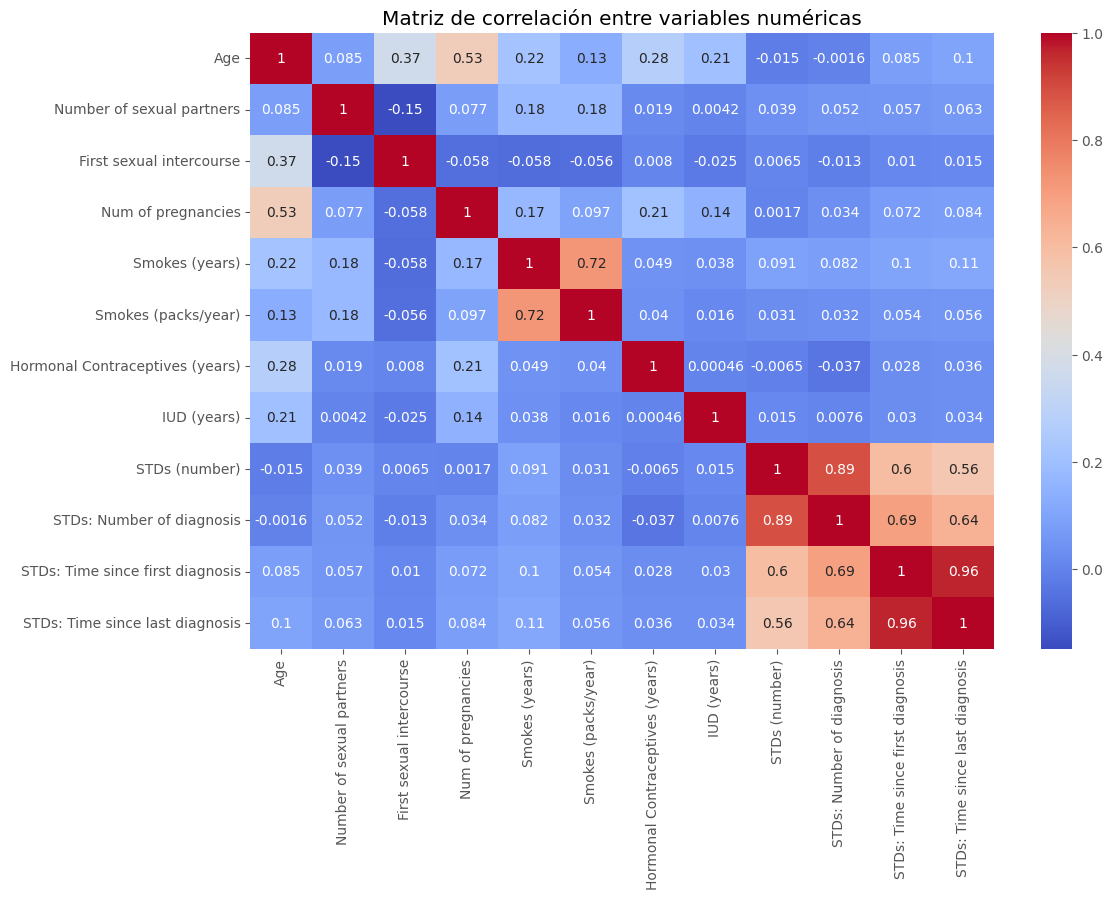

In [167]:
# Separar las variables numéricas para analizar la correlación
numeric = hospital_df[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']]

# Convertir las variables a numéricas
for column in numeric.columns:
    numeric[column] = pd.to_numeric(numeric[column].replace('?', np.nan), errors='coerce')

# Reemplazar los valores faltantes con la media de la columna
for column in numeric:
    if column != 'STDs: Time since first diagnosis' and column != 'STDs: Time since last diagnosis':
        numeric[column] = numeric[column].fillna(numeric[column].mean())
    else:
        # Reemplazar los valores faltantes con 0
        numeric[column] = numeric[column].fillna(0).astype(int)

#Matriz de correlación entre variables numéricas    
correlation_matrix = numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [160]:
# get categorical variables & make frequency tables, proportion tables, bar plots
categorical = hospital_df.select_dtypes(include=[object])
for column in categorical.columns:
    print("############################################")
    print(f"Results for {column}")
    print("############################################")
    # print the table in a visual way
    categorical[column].value_counts().plot(kind='bar')
    plt.title(f'{column} frequency')
    plt.show()
    # print the table in a visual way
    categorical[column].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'{column} proportion')
    plt.show()
    sns.countplot(x=column, data=categorical)
    plt.title(f'{column} frequency')
    plt.show()
    print('\n')

In [161]:
# Realizar one-hot encoding en las variables categóricas
categorical_columns = hospital_df.select_dtypes(include=[object]).columns
hospital_df_encoded = pd.get_dummies(hospital_df, columns=categorical_columns, drop_first=True)


# Unir las variables numéricas y categóricas codificadas
numeric = hospital_df.select_dtypes(include=['int64', 'float64'])
data_for_pca = pd.concat([numeric, hospital_df_encoded], axis=1)


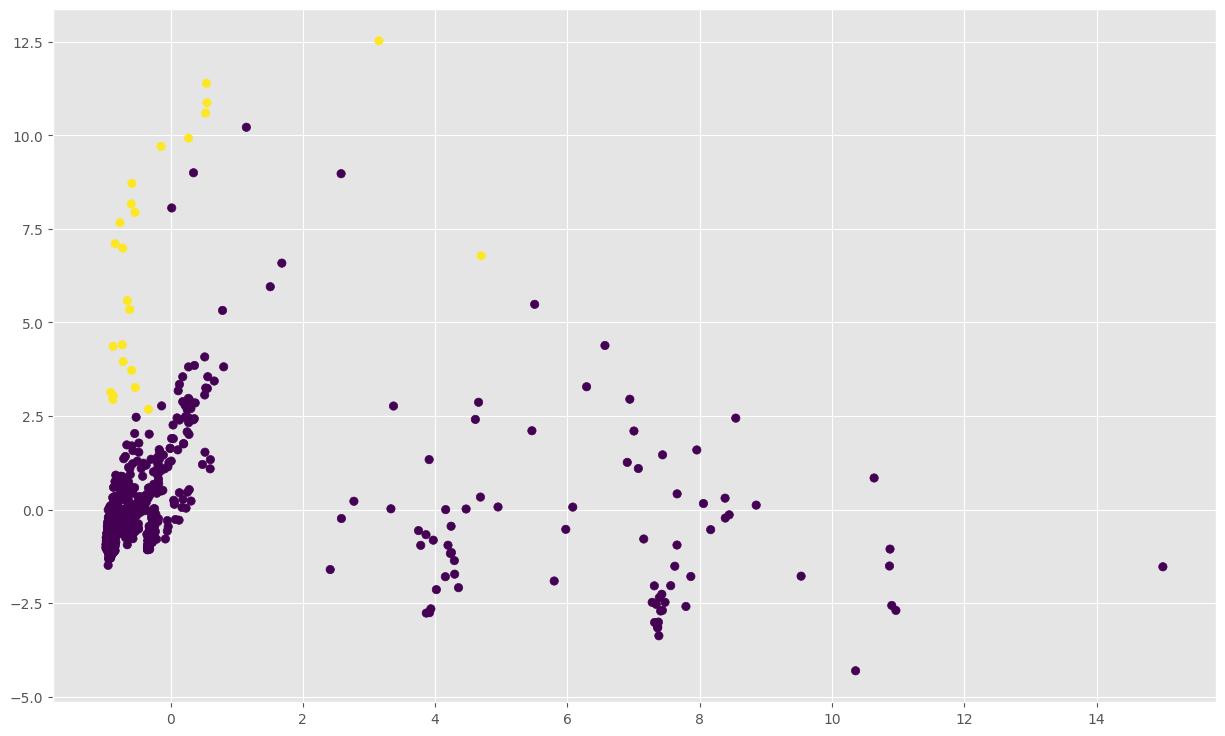

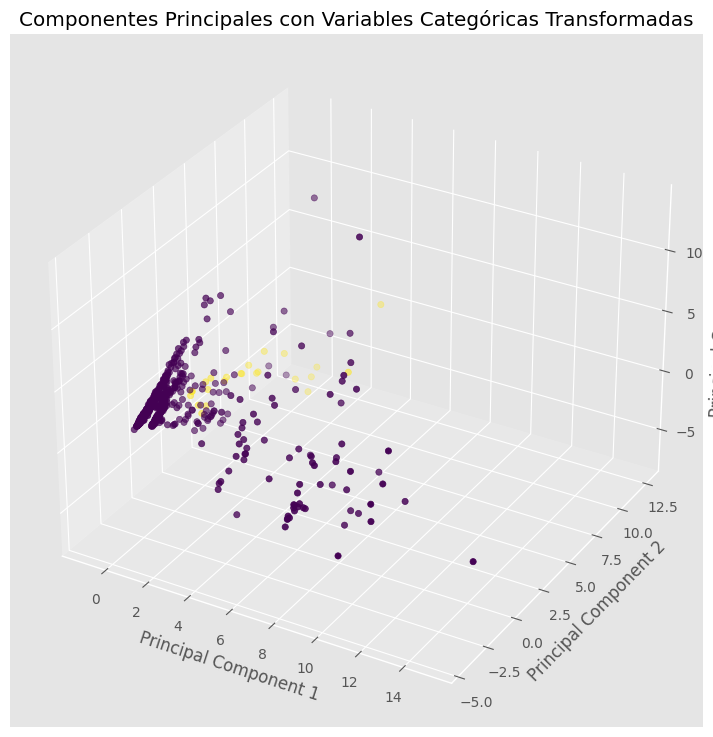

Varianza explicada por los primeros tres componentes: PCA(n_components=3)


In [162]:
scaler = StandardScaler()
hospitaldf_scaled = scaler.fit_transform(hospital_df)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(hospital_df_scaled)

plt.figure()
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cancerOrNot)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cancerOrNot)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Componentes Principales con Variables Categóricas Transformadas')
plt.show()

print("Varianza explicada por los primeros tres componentes:", np.sum(pca))

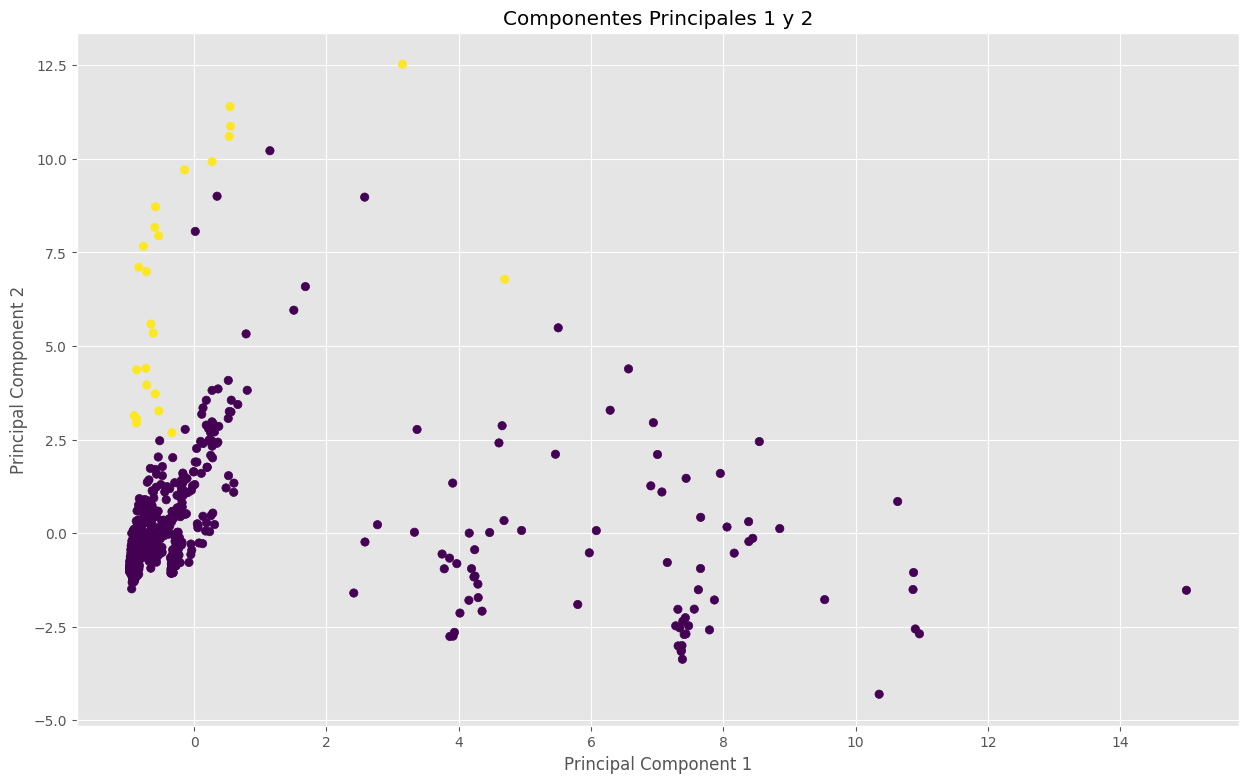

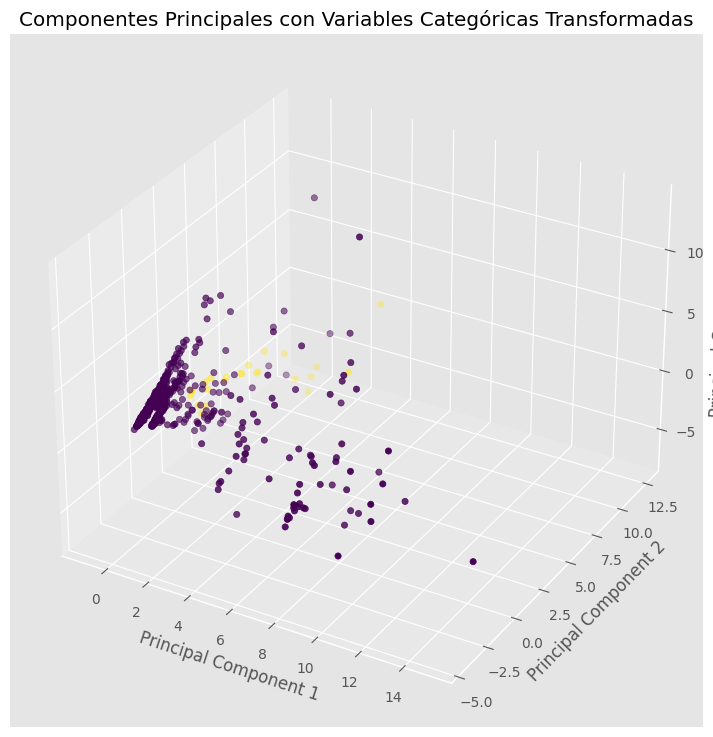

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Escalar los datos
scaler = StandardScaler()
hospitaldf_scaled = scaler.fit_transform(hospital_df)

# Aplicar PCA con 3 componentes
pca = PCA(n_components=3)
pca_result = pca.fit_transform(hospital_df_scaled)

# Varianza explicada por cada componente
# explained_variance = pca.explained_variance_ratio
# print("Varianza explicada por cada componente:", explained_variance)
# print("Varianza total explicada por los tres componentes:", np.sum(explained_variance))

# Graficar los resultados del PCA en 2D para verificar
plt.figure()
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cancerOrNot)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Componentes Principales 1 y 2')
plt.show()

# Graficar en 3D si el tercer componente está presente
if pca_result.shape[1] >= 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cancerOrNot)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('Componentes Principales con Variables Categóricas Transformadas')
    plt.show()
else:
    print("El PCA no generó el tercer componente.")

In [164]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

### Test de Esfericidad de Bartlett

In [165]:
chi_cuadrado, p_valor = calculate_bartlett_sphericity(numeric)
chi_cuadrado, p_valor

(5638.1099875379505, 0.0)

### Índice KMO

In [166]:
kmo,kmo_modelo = calculate_kmo(numeric)
kmo_modelo

0.6093420941153553

 ## Análisis de Componentes Principales

In [171]:
pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(numeric)
#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']
#Se convierte el arreglo en data frame
pd.DataFrame(
    data = modelo_pca.components_,
    columns = numeric.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
PC1,0.086976,0.070712,0.005228,0.085069,0.136894,0.097096,0.028610,0.035512,0.461502,0.489667,0.504643,0.492445
PC2,0.478088,0.193223,0.064169,0.417268,0.470297,0.438881,0.248694,0.163277,-0.146135,-0.148237,-0.079251,-0.062876
PC3,-0.441405,0.256853,-0.414186,-0.282578,0.409783,0.463171,-0.257706,-0.178256,0.019507,0.014305,-0.053219,-0.061090
PC4,-0.095520,0.345778,-0.704038,0.342176,-0.229118,-0.262946,0.210022,0.302849,-0.027003,-0.004228,0.011611,0.014690
PC5,0.023873,-0.135301,0.045371,-0.030329,0.054175,0.039750,-0.589285,0.790022,0.014903,0.018771,-0.027270,-0.030351
PC6,0.175703,0.829919,0.308571,-0.060829,-0.151199,-0.156542,-0.344008,-0.120784,-0.032019,-0.009904,-0.004241,0.002824
PC7,-0.091597,0.230314,0.170720,-0.605556,-0.010818,0.070634,0.583589,0.441250,0.041599,-0.024358,-0.002866,-0.002570
PC8,0.027749,0.035347,0.044488,0.104178,0.015532,-0.027005,0.063366,-0.002246,0.568903,0.423909,-0.454693,-0.519676
PC9,0.640492,-0.091729,-0.404161,-0.468486,0.260094,-0.324670,-0.104109,-0.111660,0.026823,0.015489,-0.022263,-0.026644
PC10,0.329848,-0.048165,-0.190550,-0.139988,-0.666391,0.613517,-0.065325,-0.049376,0.002912,0.072351,-0.005262,-0.022779


#### Representando cada variable en las diferentes componentes

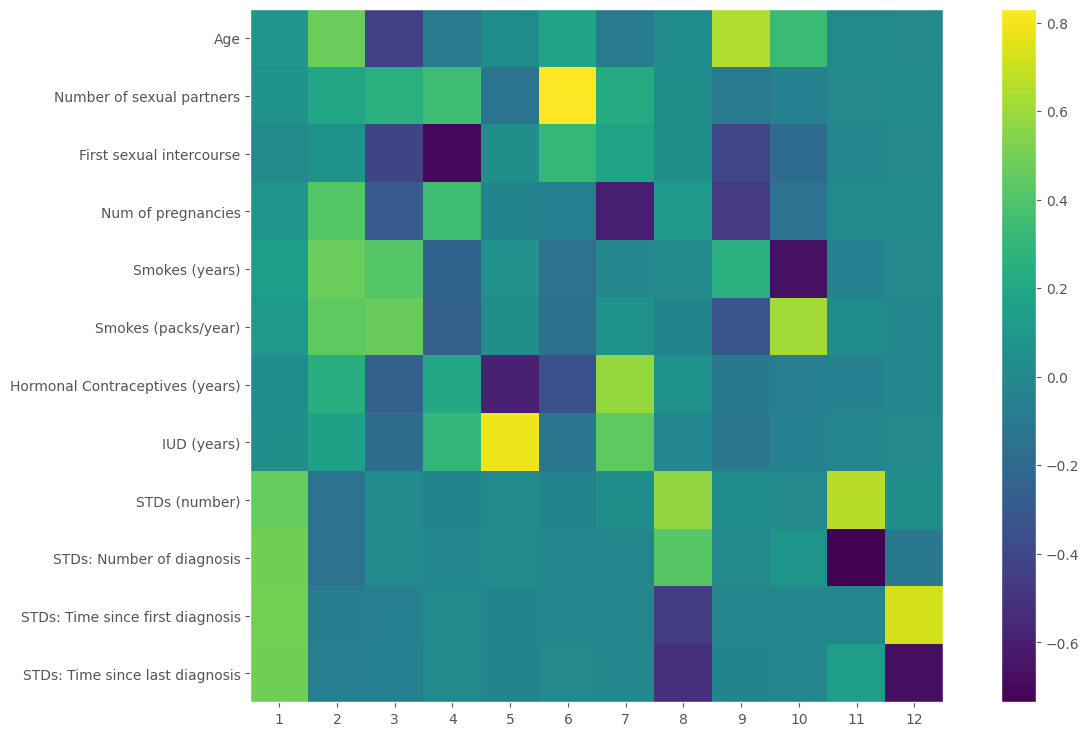

In [173]:
#Representación visual de los componentes numéricos
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(numeric.columns)), numeric.columns)
plt.xticks(range(len(numeric.columns)), np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar();

### Porcentaje de cada varianza

In [174]:
#Varianza explicada por cada componente numérico
print('****************************************************')
print('Varianza explicada por cada componente')
print('****************************************************')
print(modelo_pca.explained_variance_ratio_)

****************************************************
Varianza explicada por cada componente
****************************************************
[0.26983872 0.17248186 0.13035058 0.0932477  0.08331361 0.0734605
 0.06296565 0.05635371 0.02525519 0.02178755 0.00825473 0.00269021]


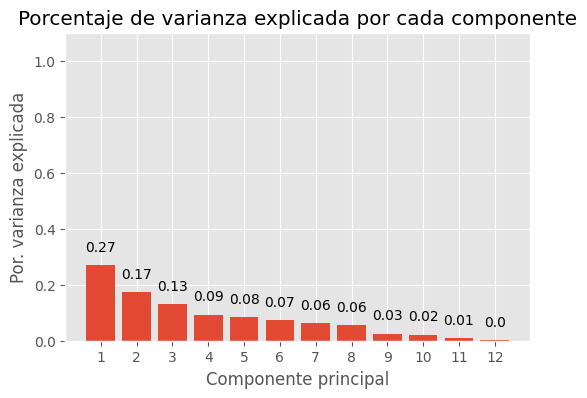

In [176]:
#Gráfico de la varianza explicada por cada componente
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)
#for para etiquetar las barras
for x, y in zip(np.arange(len(numeric.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
#Se ponen los nombres de los ejes
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

******************************************
Varianza explicada acumulada
******************************************
[0.26983872 0.44232057 0.57267115 0.66591886 0.74923246 0.82269296
 0.88565861 0.94201232 0.96726751 0.98905506 0.99730979 1.        ]


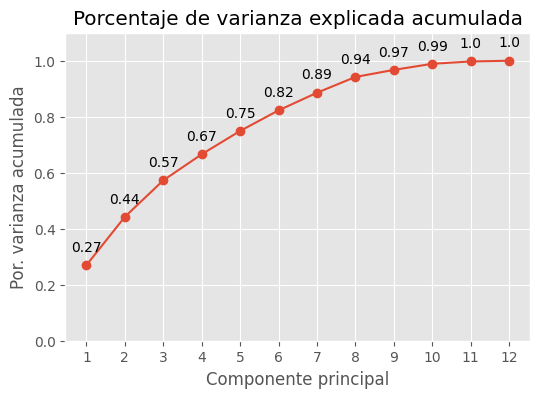

In [177]:
#Varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('******************************************')
print('Varianza explicada acumulada')
print('******************************************')
print(prop_varianza_acum)

#Gráfico de la varianza explicada acumulada
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(numeric.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)
#Etiquetas de las barras
for x, y in zip(np.arange(len(numeric.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
#Nombres de los ejes
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Reglas de asociacion

In [2]:
hospital = pd.read_csv('risk_factors_cervical_cancer.csv', encoding='ISO-8859-1')
hospital.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
# Select the categorical columns
categoricals = hospital[['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']].copy()

# Replace 1.0 and 0.0 directly with 'Yes' and 'No' without using inplace=True
categoricals['Dx:Cancer'] = categoricals['Dx:Cancer'].replace({1.0: 'Cancer', 0.0: 'Not cancer'})
categoricals['Dx:CIN'] = categoricals['Dx:CIN'].replace({1.0: 'CIN', 0.0: 'Not CIN'})
categoricals['Dx:HPV'] = categoricals['Dx:HPV'].replace({1.0: 'HPV', 0.0: 'Not HPV'})
categoricals['Dx'] = categoricals['Dx'].replace({1.0: 'Dx', 0.0: 'Not Dx'})
categoricals['Hinselmann'] = categoricals['Hinselmann'].replace({1.0: 'Hinselmann', 0.0: 'Not Hinselmann'})
categoricals['Schiller'] = categoricals['Schiller'].replace({1.0: 'Schiller', 0.0: 'Not Schiller'})
categoricals['Citology'] = categoricals['Citology'].replace({1.0: 'Citology', 0.0: 'Not Citology'})
categoricals['Biopsy'] = categoricals['Biopsy'].replace({1.0: 'Biopsy', 0.0: 'Not biopsy'})

# Optionally convert all columns to object type if needed
# categoricals = categoricals.astype(object)

categoricals.head()

,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,Not cancer,Not CIN,Not HPV,Not Dx,Not Hinselmann,Not Schiller,Not Citology,Not biopsy
1,Not cancer,Not CIN,Not HPV,Not Dx,Not Hinselmann,Not Schiller,Not Citology,Not biopsy
2,Not cancer,Not CIN,Not HPV,Not Dx,Not Hinselmann,Not Schiller,Not Citology,Not biopsy
3,Cancer,Not CIN,HPV,Not Dx,Not Hinselmann,Not Schiller,Not Citology,Not biopsy
4,Not cancer,Not CIN,Not HPV,Not Dx,Not Hinselmann,Not Schiller,Not Citology,Not biopsy


In [4]:
print(categoricals.shape)
# Se van a convertir los datos a una lista de listas
records = []

for i in range(0, 32):
    records.append([str(categoricals.values[i,j]) for j in range(0, 5)]) 
records

(858, 8)


[['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Cancer', 'Not CIN', 'HPV', 'Not Dx', 'Not Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Cancer', 'Not CIN', 'HPV', 'Dx', 'Not Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Not cancer', 'Not CIN', 'Not HPV', 'Not Dx', 'Not Hinselmann'],
 ['Not cancer', 'No

In [10]:
# El mínimo de cobertura o soporte es 20% y el mínimo de confianza es 70%
asociationRules = apriori(records,min_support=0.2, min_confidence = 0.8)
rules = list(asociationRules)
f'Reglas de asociacion: {len(rules)}'

'Reglas de asociacion: 31'

In [9]:
rules[0]

RelationRecord(items=frozenset({'Not CIN'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Not CIN'}), confidence=1.0, lift=1.0)])

In [11]:
list(rules)

[RelationRecord(items=frozenset({'Not CIN'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Not CIN'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Not Dx'}), support=0.96875, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Not Dx'}), confidence=0.96875, lift=1.0)]),
 RelationRecord(items=frozenset({'Not HPV'}), support=0.90625, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Not HPV'}), confidence=0.90625, lift=1.0)]),
 RelationRecord(items=frozenset({'Not Hinselmann'}), support=0.9375, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Not Hinselmann'}), confidence=0.9375, lift=1.0)]),
 RelationRecord(items=frozenset({'Not cancer'}), support=0.90625, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Not cancer'}), confidence=0.90625, lift=1.0)]),
 RelationRecord(items=frozenset({'Not

In [15]:
def inspect(output):
    lhs = [tuple(result[2][0][0])[0] if len(result[2][0][0]) > 0 else None for result in output]
    rhs = [tuple(result[2][0][1])[0] if len(result[2][0][1]) > 0 else None for result in output]
    support = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output if len(result[2][0]) > 2]
    lift = [result[2][0][3] for result in output if len(result[2][0]) > 3]
    return list(zip(lhs, rhs, support, confidence, lift))

output = list(rules)
output_DataFrame = pd.DataFrame(inspect(output), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_DataFrame

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,None,Not CIN,1.00000,1.00000,1.0
1,None,Not Dx,0.96875,0.96875,1.0
2,None,Not HPV,0.90625,0.90625,1.0
3,None,Not Hinselmann,0.93750,0.93750,1.0
4,None,Not cancer,0.90625,0.90625,1.0
5,None,Not Dx,0.96875,0.96875,1.0
6,None,Not CIN,0.90625,0.90625,1.0
7,None,Not CIN,0.93750,0.93750,1.0
8,None,Not cancer,0.90625,0.90625,1.0
9,None,Not Dx,0.90625,0.90625,1.0
